# Определение перспективного тарифа для телеком компании

Целью настоящего исследования является определение более прибыльного тарифа из двух тарифных планов компании «Мегалайн» —  «Смарт» и «Ультра». Результаты будут использованы для корректировки рекламного бюджета. Материалом исследования служат данные 500 клиентов «Мегалайна» по использованию услуг компании за 2018 год.

Задачи исследования:
1. Изучить активность пользователей за 2018 год и их демографические характеристики;
2. Проанализировать, сколько минут разговора, сообщений и интернет-трафика требуется пользователям разных тарифов;
3. Выявить, какой тариф в среднем приносит большую выручку;
4. Проверить наличие различий в средней выручке от клиентов из Москвы и из других регионов.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных-и-добавление-результатов-дополнительных-расчётов" data-toc-modified-id="Предобработка-данных-и-добавление-результатов-дополнительных-расчётов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных и добавление результатов дополнительных расчётов</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-(замена-типов,-заполнение-пропусков-и-т.д.)" data-toc-modified-id="Подготовка-данных-(замена-типов,-заполнение-пропусков-и-т.д.)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных (замена типов, заполнение пропусков и т.д.)</a></span></li><li><span><a href="#Подготовка-пользовательских-данных-(звонки,-смс,-объем-трафика-и-т.д.)" data-toc-modified-id="Подготовка-пользовательских-данных-(звонки,-смс,-объем-трафика-и-т.д.)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка пользовательских данных (звонки, смс, объем трафика и т.д.)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Статистический анализ данных</a></span><ul class="toc-item"><li><span><a href="#Использование-минут-разговора" data-toc-modified-id="Использование-минут-разговора-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Использование минут разговора</a></span></li><li><span><a href="#Отправка-сообщений" data-toc-modified-id="Отправка-сообщений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Отправка сообщений</a></span></li><li><span><a href="#Использование-интернет-трафика" data-toc-modified-id="Использование-интернет-трафика-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Использование интернет-трафика</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Тест-№1:-средняя-выручка-по-тарифам" data-toc-modified-id="Тест-№1:-средняя-выручка-по-тарифам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тест №1: средняя выручка по тарифам</a></span><ul class="toc-item"><li><span><a href="#Результаты-теста-№1" data-toc-modified-id="Результаты-теста-№1-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Результаты теста №1</a></span></li></ul></li><li><span><a href="#Тест-№2" data-toc-modified-id="Тест-№2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Тест №2</a></span><ul class="toc-item"><li><span><a href="#Результаты-теста-№2" data-toc-modified-id="Результаты-теста-№2-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Результаты теста №2</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файлов

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from functools import reduce

In [2]:
#открытие файлов
df_calls = pd.read_csv('/datasets/calls.csv') 
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

Изучим данные в каждой таблице.

In [3]:
df_calls.info()
df_calls.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
198083,1485_10,2018-12-31,7.27,1485
194820,1477_568,2018-09-02,9.70,1477
6733,1018_521,2018-07-15,12.05,1018


В таблице df_calls содержится информация о звонках: идентификационный номер, дата, длительность звонка в минутах и идентификатор пользователя, сделавшего звонок. Видим, что формат даты - object, для удобства работы лучше изменить его на datetime. Пропущенных значений в датафрейме нет.

In [4]:
df_internet.info()
df_internet.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
70902,1240_570,296.56,2018-11-13,1240
16371,1056_175,200.16,2018-10-12,1056
126743,1425_272,9.72,2018-07-03,1425


Таблица df_internet содержит информацию об интернет-сессиях: номер сессии, объём потраченного интернет-трафика в мегабайтах, дату и идентификатор пользователя. Формат даты здесь тоже нужно изменить. Пропущенных значений в датафрейме нет.

In [5]:
df_messages.info()
df_messages.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
101841,1416_158,2018-10-12,1416
62164,1273_22,2018-06-08,1273
18819,1083_8,2018-06-29,1083


В таблице df_messages собрана информация о сообщениях: id, дата сообщения и идентификатор пользователя. Как и в предыдущих датафреймах, нужно изменить формат даты. Пропущенных значений нет. 

In [6]:
df_tariffs.info()
display(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице df_tariffs собраны характеристики двух тарифов, которые мы будем сравнивать.
1. Тариф «Смарт»:
- Ежемесячная плата: 550 рублей;
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;
- Услуги сверх тарифного пакета: 1 минута разговора - 3 рубля; 1 сообщение - 3 рубля; 1 Гб интернет-трафика - 200 рублей.
2. Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей;
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;
- Услуги сверх тарифного пакета: 1 минута разговора - 1 рубль; 1 сообщение - 1 рубль; 1 Гб интернет-трафика - 150 рублей.

Для расчётов стоит помнить, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился 1 секунду, будет засчитан за 1 минуту. Для интернет-трафика округляется общая сумма за месяц.

In [7]:
df_users.info()
df_users.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
318,1318,53,NaN,Курган,Марьяна,Анищенко,2018-03-22,ultra
24,1024,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra
259,1259,33,NaN,Санкт-Петербург,Эмилия,Третьякова,2018-11-04,ultra


Таблица users содержит информацию о пользователях: уникальный идентификатор пользователя (столбец, который присутствует во всех датафреймах, кроме тарифов, и по которому мы сможем объединять таблицы), имя, фамилию пользователя, возраст, город проживания, дату подключения тарифа и дату прекращения пользования тарифом (в обеих колонках формат нужно изменить на datetime), название тарифного плана. В столбце churn_date достаточно большое (462) количество пропусков, и в рамках нашего исследования это хороший знак - если дата прекращения пользования тарифом не указана, то тариф ещё действовал на момент выгрузки данных, значит, всего 38 пользователей из 500 остались недовольны предоставленным пакетом услуг.

### Вывод

Нам были предоставлены 5 файлов с информацией о пользовании услугами компании «Мегалайн»: статистика по звонкам, сообщениям и использовании мобильного интернета. В датафреймах есть общий столбец user_id, по которому мы сможем объединить все данные. После первичного анализа была выявлена необходимость проведения некоторой предобработки данных: например, изменения формата дат.

## Предобработка данных и добавление результатов дополнительных расчётов

### Подготовка данных (замена типов, заполнение пропусков и т.д.)

**Звонки**

In [8]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') #изменим формат даты

Поскольку мы будем исследовать пользование тарифом по месяцам, добавим соответствующий столбец в датафрейм. 

In [9]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month  

In [10]:
df_calls.info() #посмотрим на краткую сводку

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [11]:
df_calls.duplicated().sum() #проверим наличие дубликатов

0

In [12]:
df_calls.describe() #посмотрим на статистические показатели

,duration,user_id,month
count,202607.000000,202607.000000,202607.000000
mean,6.755887,1253.940619,8.574067
std,5.843365,144.722751,2.787093
min,0.000000,1000.000000,1.000000
25%,1.300000,1126.000000,7.000000
50%,6.000000,1260.000000,9.000000
75%,10.700000,1379.000000,11.000000
max,38.000000,1499.000000,12.000000


Продолжительность звонков варьируется от нуля до 38 минут. Поскольку «Мегалайн» всегда округляет секунды до минут, переведём значения в целочисленный формат и проверим, присутствуют ли в данных какие-то аномалии.

In [13]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

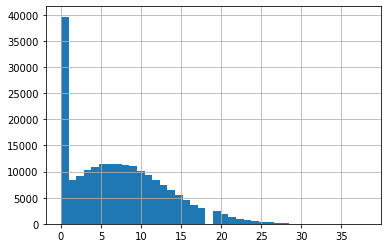

In [14]:
df_calls['duration'].hist(bins=40); #построим гистограмму продолжительности звонков

Плавность распределения нарушает высокий пик звонков с нулевой продолжительностью - почти 40 тысяч значений. Поскольку мы уже округлили секунды, нулями могут быть обозначены звонки, по которым тарификация так и не началась, например, если их пропустили или "сбросили". Проверим, как они распределены по пользователям.

In [15]:
df_calls[df_calls['duration'] == 0].groupby('user_id')['duration'].count().sort_values(ascending=False).head()

user_id
1377    336
1168    308
1453    295
1375    290
1196    262
Name: duration, dtype: int64

In [16]:
df_calls.groupby('user_id')['duration'].count().sort_values(ascending=False).head() 

user_id
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
Name: duration, dtype: int64

Лидерами по числу нулевых звонков являются пользователи, которые в целом часто звонят, поэтому большое количество пропущенных звонков выглядит реалистично. Нулевые звонки не влияют на расходование месячного пакета, но будут полезны при подсчёте количества совершённых звонков и оценке востребованности данной услуги, поэтому не будем удалять эти значения из датафрейма.

**Интернет**

In [17]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d') #изменим формат даты

In [18]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month #выделим из даты месяц

In [19]:
df_internet.info() #посмотрим на краткую сводку

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 6.8+ MB


In [20]:
df_internet.duplicated().sum() #проверим наличие дубликатов

0

In [21]:
df_internet.describe() #посмотрим на статистические показатели

,mb_used,user_id,month
count,149396.000000,149396.000000,149396.000000
mean,370.192426,1252.099842,8.563315
std,278.300951,144.050823,2.788717
min,0.000000,1000.000000,1.000000
25%,138.187500,1130.000000,7.000000
50%,348.015000,1251.000000,9.000000
75%,559.552500,1380.000000,11.000000
max,1724.830000,1499.000000,12.000000


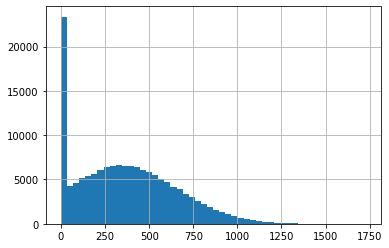

In [22]:
df_internet['mb_used'].hist(bins=50); #посмотрим на распределение использования трафика

In [23]:
df_internet.loc[df_internet['mb_used'] == 0, 'mb_used'].count() #посчитаем количество нулевых значений

19598

Аналогично таблице со звонками, мы видим большое количество интернет-сессий с нулевой тарификацией. Возможно, они появились в логах из-за ошибок подключения или во время переключения между разными сетями. В данном случае нас не интересует количество сессий, только общий объём потраченного трафика, поэтому удалим пропущенные значения. 

In [24]:
df_internet = df_internet.query('mb_used > 0').reset_index()

In [25]:
df_internet.info() #посмотрим на сводку по получившемуся датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 6 columns):
index           129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
month           129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.9+ MB


**Сообщения**

In [26]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d') #изменим формат даты

In [27]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month #выделим из даты месяц

In [28]:
df_messages.info() #посмотрим на краткую сводку

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [29]:
df_messages.duplicated().sum() #проверим наличие дубликатов

0

С данными по сообщениям всё в порядке.

**Пользователи**

In [30]:
#изменим формат дат
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [31]:
df_users.info() #посмотрим на краткую сводку

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [32]:
df_users.duplicated().sum() #проверим наличие дубликатов

0

In [33]:
df_users.describe() #посмотрим на статистические показатели

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В возрасте клиентов - от 18 до 75 лет - также не обнаружено подозрительных значений.

### Подготовка пользовательских данных (звонки, смс, объем трафика и т.д.)

Вычислим по месяцам для каждого пользователя количество сделанных звонков и израсходованных минут разговора.

In [34]:
user_calls = df_calls.groupby(['user_id', 'month'], as_index=False).agg({'id':'count', 'duration':'sum'})\
.rename(columns={'duration':'total_duration','id':'calls_count'})
user_calls.sample(3)

,user_id,month,calls_count,total_duration
1646,1264,8,67,451
72,1009,12,32,229
1756,1282,2,98,747


Также вычислим для каждого пользователя количество отправленных сообщений по месяцам. 

In [35]:
user_messages = df_messages.groupby(['user_id', 'month'], as_index=False)['id'].count().rename(columns={'id':'sms_count'})
user_messages.sample(3)

,user_id,month,sms_count
2218,1412,9,54
2124,1396,7,89
2187,1408,6,8


Посчитаем объем израсходованного пользователями интернет-трафика по месяцам.

In [36]:
user_internet = df_internet.groupby(['user_id', 'month'], as_index=False)['mb_used'].sum()
user_internet.sample(3)

,user_id,month,mb_used
1092,1173,6,11687.01
557,1089,3,17495.18
696,1109,11,15345.94


Теперь узнаем помесячную выручку с каждого пользователя. Сначала соберём необходимые для расчётов данные в один датафрейм.

In [37]:
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

In [38]:
data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), 
              [user_calls, user_messages, user_internet]).merge(df_users, on='user_id', how='outer') \
              .merge(df_tariffs, on='tariff', how='outer')

In [39]:
data.info() #посмотрим сводку по получившейся таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
calls_count              3174 non-null float64
total_duration           3174 non-null float64
sms_count                2717 non-null float64
mb_used                  3201 non-null float64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per

Мы видим, что в сведенной таблице появились пропуски в столбцах со значениями продолжительности звонков, отправленных сообщений и использованного веб-трафика. Они означают, что по конкретному месяцу нет данных о том, что клиент использовал конкретную услугу. Интересно, что возникло два пропуска в самом столбце month: посмотрим на эти строки.

In [40]:
data[data['month'].isna() == True]

,user_id,month,calls_count,total_duration,sms_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


В нашей выборке есть два пользователя, по которым вообще нет данных о совершенных звонках, отправленных сообщениях или использованном интернете. Тарифы у них разные, но у обоих указана дата прекращения использования (декабрьская и достаточно близкая к дате регистрации). Возможно, они получили новый телефон в подарок на Новый год, а потом решили, что новая сим-карта им не нужна. В любом случае, качество предоставленных услуг вряд ли повлияло на уход указанных клиентов, поэтому мы можем удалить эти строки, чтобы они не мешали в дальнейших расчётах.

In [41]:
data.dropna(subset = ['month'], inplace = True) 

Остальные пропуски в звонках, сообщениях и интернете заменим на нули. 

In [42]:
data['total_duration'] = data['total_duration'].fillna(0).astype('int')
data['calls_count'] = data['calls_count'].fillna(0).astype('int')
data['sms_count'] = data['sms_count'].fillna(0).astype('int')
data['mb_used'] = data['mb_used'].fillna(0).apply(np.ceil).astype('int')

In [43]:
data.isna().sum() #проверим замену пропусков

user_id                     0
month                       0
calls_count                 0
total_duration              0
sms_count                   0
mb_used                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Данные подготовлены, теперь можно вычислять выручку. Напишем функцию для подсчёта абонентской платы и сверх тарифных затрат.

In [44]:
def revenue(row):
    sms = np.where(row['sms_count'] > row['messages_included'], 
                (row['sms_count'] - row['messages_included']) * row['rub_per_message'], 0)
    gb = np.where(row['mb_used'] > row['mb_per_month_included'], 
                np.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb'], 0)
    calls = np.where(row['total_duration'] > row['minutes_included'], 
                (row['total_duration'] - row['minutes_included']) * row['rub_per_minute'], 0)
    return row['rub_monthly_fee'] + sms + gb + calls

In [45]:
data['total_payment'] = data.apply(revenue, axis=1) #применим написанную функцию и добавим столбец в датафрейм

In [46]:
data.sample(3).T

,3189,613,1954
user_id,1496,1350,1209
month,3,8,10
calls_count,79,4,38
total_duration,557,35,322
sms_count,46,2,66
mb_used,24959,1620,21646
age,36,40,27
churn_date,NaT,NaT,NaT
city,Вологда,Омск,Омск
first_name,Трифон,Варвара,Альбин


### Вывод

Мы привели в порядок формат дат и посчитали для каждого пользователя по месяцам количество сделанных звонков, количество отправленных сообщений, объём израсходованного интернет-трафика, а также вычислили помесячную выручку с каждого пользователя с учётом платы за тарифный план. В выборке также было обнаружено 2 пользователя, которые не пользовались никакими услугами и достаточно быстро отказались от своих тарифов, очевидно, по причинам, не связанным с качеством связи.

## Статистический анализ данных

Продолжим изучать поведение пользователей. Выясним, сколько минут, сообщений и какой объём интернет-трафика обычно требуется в месяц пользователям каждого тарифа.

In [47]:
pd.options.display.float_format = '{:,.3f}'.format #для удобства округлим числа до тысячных

In [48]:
def visualization(column, nb, subj, xlabel): #автоматизируем построение графиков
    fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(16, 5))

    sns.distplot(data.loc[data['tariff']=='ultra',  column], bins=nb, ax=axes[0], label='Тариф "Ультра"')
    sns.distplot(data.loc[data['tariff']=='smart',  column], bins=nb, ax=axes[0], label='Тариф "Смарт"')
    axes[0].set_title('Использование пакета ' + subj, fontsize=15)
    axes[0].set_xlabel(xlabel, fontsize=12)
    axes[0].set_ylabel('Плотность частоты', fontsize=12)
    axes[0].legend()

    sns.boxplot(y="tariff", x=column, data=data, orient="h")
    axes[1].set_title('Диаграммы размаха для использования пакета ' + subj, fontsize=15)
    axes[1].set_xlabel(xlabel, fontsize=12)
    axes[1].set_ylabel('Тарифы', fontsize=12)

Посчитаем среднее арифметическое, дисперсию и стандартное отклонение для интересующих метрик.

In [49]:
data.pivot_table(columns='tariff', values=['total_duration','sms_count', 'mb_used'], aggfunc=['mean', 'var', 'std'])

mean                       var                       std  \
tariff              smart      ultra          smart           ultra     smart   
mb_used        16,208.873 19,469.309 34,462,562.806 101,751,557.966 5,870.482   
sms_count          33.384     49.363        796.813       2,285.266    28.228   
total_duration    417.935    526.623     36,219.316     100,873.633   190.314   

                           
tariff              ultra  
mb_used        10,087.198  
sms_count          47.804  
total_duration    317.606

Пользователи тарифа "Ультра" в среднем тратят больше звонков, сообщений и мегабайт интернета, что ожидаемо. Дисперсия и стандартное отклонение по всем показателям также в разы выше, чем на тарифе "Смарт". Построим графики, чтобы наглядно показать разброс значений.

### Использование минут разговора

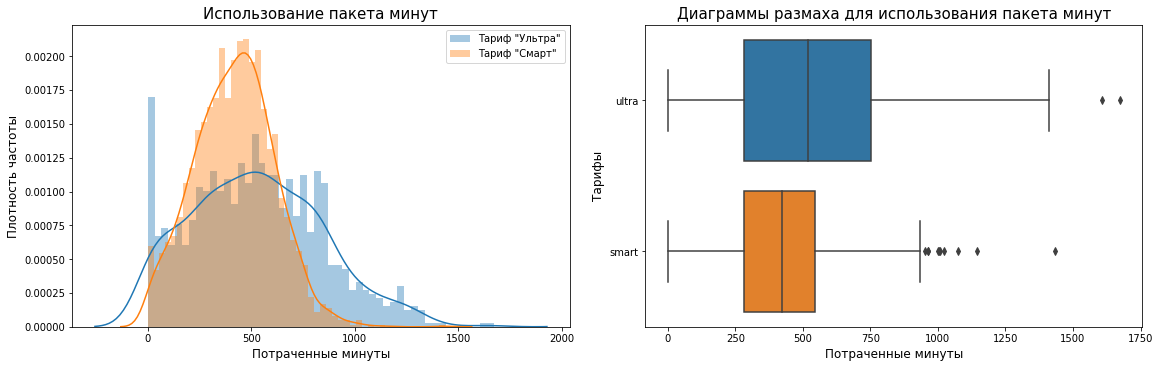

In [50]:
visualization('total_duration', 50, 'минут', 'Потраченные минуты')

В тариф "Смарт" включено 500 минут разговора. Среднее использование составляет 418 минут, большинство пользователей тратят от 250 до 580 минут, то есть более чем на половину используют пакет или немного превышают лимит. Распределение смещено влево, люди чаще укладываются в лимит (хотя стоит отметить, что график в диапазоне от 600 до 800 минут достаточно плотный, т.е. есть пользователи, которым требуется больше минут разговора), выделяется небольшой пик клиентов, которые вообще не совершают звонки. Разговоры продолжительностью свыше 950 минут редки и на диаграмме размаха отмечены как выбросы.

В тариф «Ультра» включено 3000 минут разговора, но большинство пользователей не тратит даже трети пакета: среднее использование составляет 527 минут, большая часть значений лежит в диапазоне от нуля до 850 минут, причём лидируют "нулевые" звонки. Распределение не похоже на нормальное и сильно смещено влево.

### Отправка сообщений

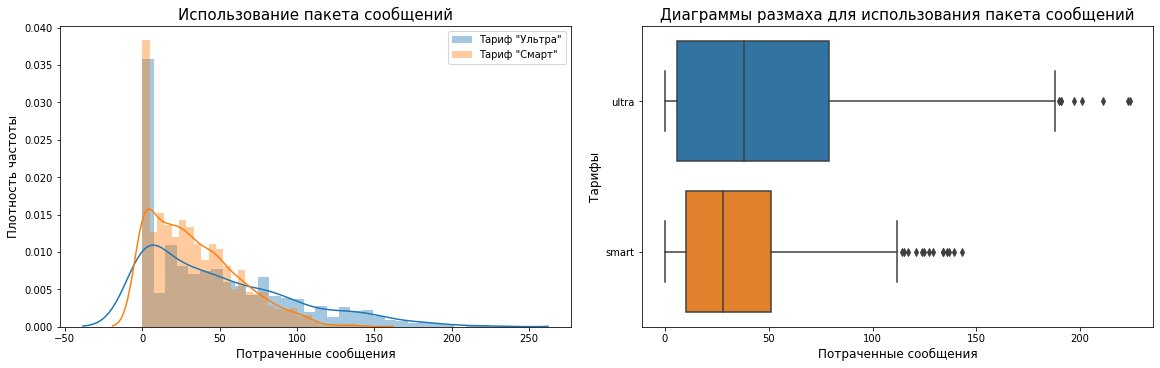

In [51]:
visualization('sms_count', 30, 'сообщений', 'Потраченные сообщения')

Хотя пользователи тарифа "Смарт" в среднем отправляют 33 сообщения при бесплатно доступных 50, гистограмма показывает, что многие клиенты вообще не пользуются этой услугой. Те, кто отправляет сообщения, в основном укладываются в доступный лимит: значения выше 50 лежат за пределами третьего квартиля, датасет сильно скошен влево.

Распределение использования пакета сообщений по тарифу «Ультра» похожее: из доступных 1000 сообщений тратится максимум одна пятая часть, график сильно смещён влево. Размер первого и второго квартиля значительно меньше, чем третьего и четвёртого, так как пользователи, которые всё-таки пользуются услугой отправки сообщений, делают это относительно активно, поэтому среднее число отправленных сообщений по выборке составляет 49 при подавляющем большинстве нулевых значений. 

### Использование интернет-трафика

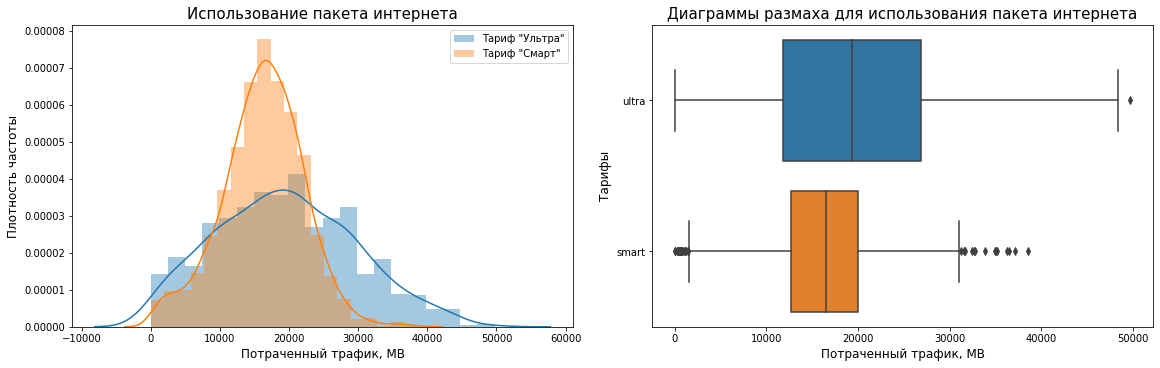

In [52]:
visualization('mb_used', 20, 'интернета', 'Потраченный трафик, MB')

В тариф "Смарт" включено 15 Гб интернет-трафика, и как раз примерно на это значение приходится вершина гистограммы распределения, которое близко к нормальному. Похоже, что в тарифе "Смарт" интернет - самая востребованная услуга: большинство клиентов используют доступный пакет полностью и часто выходят за его границы. Диаграмма размаха показывает, что четвёртый квартиль заканчивается примерно на 30 Гб (т.е. превышает лимит трафика в два раза), низкое использование интернета (меньше 2 Гб) также является нехарактерным для выборки.

Пользователи тарифа "Ультра" тоже активнее пользуются интернетом, чем звонками или сообщениями, и в основном укладываются в доступный лимит: из 30 Гб интернет-трафика в среднем используют 19-20 Гб, верхняя граница третьего квартиля также не доходит до 30 Гб, распределение смещено влево.

### Вывод

По результатам анализа можно выделить следующие особенности поведения пользователей:
- Самой используемой услугой является мобильный интернет, причём на тарифе "Смарт" пользователи часто превышают доступный лимит (вплоть до двухкратного превышения), значит, приносят дополнительную выручку. Пользователям тарифа "Ультра" в большинстве хватает месячного пакета;
- Пользователи тарифа "Смарт" достаточно активно звонят, в основном находясь в пределах доступного лимита, но выделяется прослойка клиентов, которым требуется на 100-300 минут больше (т.е. они тоже приносят дополнительный доход). На тарифе "Ультра" много клиентов, которые вообще не совершают звонки, те, кто пользуется этой услугой, обычно тратят не больше трети пакета;
- Самой непопулярной услугой на обоих тарифах является отправка сообщений. Число пользователей тарифа "Смарт", превышающих лимит сообщений, невелико, на тарифе "Ультра" такие клиенты отсутствуют.

## Проверка гипотез

### Тест №1: средняя выручка по тарифам

Проверим несколько статистических гипотез. Во-первых, предположим, что средняя выручка с тарифа "Ультра" равна средней выручке с тарифа "Смарт" - это будет нулевая гипотеза. Альтернативная гипотеза: средняя выручка с тарифов "Ультра" и "Смарт" различается. Сформируем два массива для сравнения. Поскольку данные по тарифам не зависят друг от друга, будем использовать метод *scipy.stats.ttest_ind*. Пороговое значение alpha возьмём стандартное - 5%, по 2,5% c каждой стороны распределения.

In [53]:
smart = data.loc[data['tariff'] == 'smart', 'total_payment']
ultra = data.loc[data['tariff'] == 'ultra', 'total_payment']

In [54]:
alpha = 0.05

Проведём статистический тест Левена, чтобы отпределить, можно ли считать равными дисперсии двух выборок (чтобы понять, какой параметр equal_var использовать для метода ttest_ind). Нулевая гипотеза: дисперсии выборок smart и ultra равны. Альтернативная гипотеза: дисперсии выборок smart и ultra различаются. 

In [55]:
st.levene(smart, ultra)

LeveneResult(statistic=604.5068994427307, pvalue=1.8783148636310733e-122)

Получившаяся p-value намного меньше значения alpha, значит, отвергаем нулевую гипотезу: нельзя считать дисперсию по выборкам одинаковой. Будем использовать equal_var = False.

In [56]:
results = st.ttest_ind(smart, ultra, equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


По результатам теста нулевая гипотеза была отвергнута, значит, со статистической вероятностью средняя выручка с тарифов "Ультра" и "Смарт" различается. Выше мы рассматривали распределения по использованию минут, сообщений и мобильного интернета и пришли к выводу, что пользователи тарифа "Смарт" чаще выходят за границы месячного пакета для всех услуг, то есть несут дополнительные затраты, следовательно, есть вероятность, что выручка с этого тарифа выше. Сформулируем альтернативную гипотезу номер два: средняя выручка с тарифа "Смарт" больше, чем с тарифа «Ультра». Нулевая гипотеза остаётся прежней. Проведём односторонний тест.

In [57]:
results = st.ttest_ind(smart, ultra, equal_var = False) 
print('p-значение:', results.pvalue / 2)

if results.pvalue / 2 < alpha and smart.mean() > ultra.mean():
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.1303156965538042e-250
Не получилось отвергнуть нулевую гипотезу


Наше предположение не оправдалось: в одностороннем тесте среднее тарифа "Ультра" оказалось выше, и нулевую гипотезу отвергнуть не удалось. Посмотрим, какие средние значения выручки получились в нашей выборке.

In [58]:
print('Средняя выручка с тарифа "Смарт":', smart.mean())
print('Средняя выручка с тарифа "Ультра":', ultra.mean())

Средняя выручка с тарифа "Смарт": 1289.9735307312696
Средняя выручка с тарифа "Ультра": 2070.1522842639592


Как мы видим, средняя выручка с тарифа "Ультра" значительно выше, чем на тарифе "Смарт".

#### Результаты теста №1

Принята альтернативная гипотеза: средняя выручка с тарифов "Ультра" и "Смарт" различается. Данные показывают, что различие в пользу более дорогого тарифа "Ультра".

### Тест №2

Предположим, что географический фактор может влиять на стоимость используемых услуг. Сформулируем нулевую гипотезу так: средняя выручка для пользователей из Москвы не отличается от выручки для пользователей из других регионов. Альтернативная гипотеза: средняя выручка по Москве отличается от выручки с регионов.

In [59]:
data['city'].unique() #проверим, какие города представлены в выборке

array(['Краснодар', 'Москва', 'Новокузнецк', 'Иваново', 'Омск', 'Уфа',
       'Томск', 'Санкт-Петербург', 'Тверь', 'Ярославль', 'Тюмень',
       'Ростов-на-Дону', 'Калуга', 'Тула', 'Волгоград', 'Саранск',
       'Иркутск', 'Череповец', 'Новосибирск', 'Брянск', 'Тольятти',
       'Нижний Тагил', 'Воронеж', 'Махачкала', 'Пермь', 'Сургут', 'Пенза',
       'Мурманск', 'Набережные Челны', 'Самара', 'Нижний Новгород',
       'Кемерово', 'Кострома', 'Оренбург', 'Магнитогорск', 'Астрахань',
       'Нижневартовск', 'Челябинск', 'Курган', 'Красноярск',
       'Владивосток', 'Смоленск', 'Владимир', 'Казань', 'Саратов',
       'Севастополь', 'Рязань', 'Екатеринбург', 'Стерлитамак',
       'Ульяновск', 'Балашиха', 'Барнаул', 'Киров', 'Сочи', 'Вологда',
       'Чебоксары', 'Чита', 'Петрозаводск', 'Хабаровск', 'Ставрополь',
       'Улан-Удэ', 'Курск', 'Якутск', 'Химки', 'Владикавказ', 'Ижевск',
       'Орёл', 'Белгород', 'Архангельск', 'Липецк', 'Волжский', 'Тамбов',
       'Калининград', 'Новороссий

In [60]:
data['city'] = data['city'].where(data['city'] == 'Москва', 'Регионы') #выполним выборочную замену названий

Предыдущий тест показал, что выручка с разных тарифов различается, поэтому для корректности исследования проведём сравнение выручки для Москвы и регионов с учётом тарифа. Подготовим 4 выборки. Пороговое значение alpha оставим 5%.

In [61]:
moscow_smart = data.query('tariff == "smart" & city == "Москва"')['total_payment']
moscow_ultra = data.query('tariff == "ultra" & city == "Москва"')['total_payment']
regions_smart = data.query('tariff == "smart" & city == "Регионы"')['total_payment']
regions_ultra = data.query('tariff == "ultra" & city == "Регионы"')['total_payment']

In [62]:
results = st.ttest_ind(moscow_smart, regions_smart, equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу для тарифа "Смарт"')
else:
    print ('Не получилось отвергнуть нулевую гипотезу для тарифа "Смарт"')

p-значение: 0.15468343176376667
Не получилось отвергнуть нулевую гипотезу для тарифа "Смарт"


In [63]:
results = st.ttest_ind(moscow_ultra, regions_ultra, equal_var = False) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу для тарифа "Ультра"')
else:
    print ('Не получилось отвергнуть нулевую гипотезу для тарифа "Ультра"')

p-значение: 0.8544997530689904
Не получилось отвергнуть нулевую гипотезу для тарифа "Ультра"


Как мы видим, по результатам обоих тестов нулевую гипотезу отвергуть не получилось, то есть средняя выручка с пользователей из Москвы статистически не отличается от выручки по остальным регионам. Проверим, какие средние значения выручки были в наших выборках.

In [64]:
data.pivot_table(index='tariff', columns='city', values='total_payment', aggfunc=['count', 'mean'])

count              mean          
city   Москва Регионы    Москва   Регионы
tariff                                   
smart     386    1843 1,239.358 1,300.575
ultra     225     760 2,074.000 2,069.013

Из сводной таблицы видно, что разница в средней выручке по местоположению пользователя минимальна. Больше пользователей предпочитают бюджетный тариф "Смарт", но более дорогой тариф "Ультра" тоже хорошо представлен как в Москве, так и в регионах.

#### Результаты теста №2

Принята нулевая гипотеза: средняя выручка для пользователей из Москвы не отличается от выручки для пользователей из других регионов.

## Общий вывод

В настоящем исследовании была проанализирована статистика использования двух тарифных планов компании "Мегалайн". Для каждого клиента мы посчитали по месяцам количество сделанных звонков, отправленных сообщений, объём израсходованного интернет-трафика, затем вычислили помесячную выручку с каждого пользователя с учётом платы за тарифный план. 

Были выявлены следующие особенности поведения пользователей:
1. На обоих тарифах самой популярной услугой является мобильный интернет. Пользователи тарифа "Смарт" в среднем используют в месяц 15-16 Гб (в тариф включено 15), пользователи тарифа "Ультра" в среднем используют 19-20 Гб (в тариф включено 30).
2. На втором месте по используемости находятся звонки. На тарифе "Смарт" в среднем тратят от 250 до 580 минут (при 500 включённых), есть пользователи, которые на 100-300 пунктов превышают доступный лимит. На тарифе "Ультра" большая часть месячных разговоров не превышает 850 минут при включённых 3000. На обоих тарифах присутствуют пользователи, которые вообще не пользуются звонками, на "Ультре" таких клиентов больше.
3. Самой непопулярной услугой на обоих тарифах является отправка сообщений. Многие клиенты вообще не пользуются этой услугой. Пользователи тарифа "Смарт" в среднем отправляют 33 сообщения из бесплатно доступных 50; пользователи тарифа "Ультра" в среднем отправляют всего 49 сообщений из 1000.

Мы проверили две статистические гипотезы касательно средней выручки и получили следующие результаты:
1. Средняя выручка с тарифов "Ультра" и "Смарт" различается в пользу тарифа "Ультра".
2. Средняя выручка для пользователей из Москвы не отличается от выручки для пользователей из других регионов.

По результатам исследования мы можем сделать следующие рекомендации компании "Мегалайн":
1. В рекламной кампании сделать упор на более дорогостоящий тариф "Ультра". В качестве его конкурентного преимущества можно указать большой доступный пакет мобильного интернета.
2. Пересмотреть размеры пакета сообщений (возможно, в пользу звонков), так как эта услуга является невостребованной.